In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score,precision_score,recall_score,classification_report, confusion_matrix
import pandas as pd
from pathlib import Path
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import multilabel_confusion_matrix
from torch.utils.data import Dataset
from sklearn import svm
from sklearn.feature_selection import SelectKBest
import sklearn.feature_selection as fs
import numpy as np
from sklearn.manifold import TSNE
from pywt import wavedec
%matplotlib notebook


In [3]:
import pandas as pd 
import seaborn as sns
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import neptune.new as neptune
import glob
import scipy.io
import pywt


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def save_to_csv(df,filename,normalize=True):
    if normalize:
        df = (df-df.mean())/df.std()
    df['SafetyPref_3c'] = pd.read_csv('./Data-windowing_3C.csv').loc[:,'SafetyPref_3c']
    df.to_csv(filename+'.csv',index=False)
    

## Wavelet Coefficients 

In [319]:
def wavelet_avg_features(data,type_wav):
    
    coeffs = wavedec(data, type_wav,level=5)
    features = []
    cD_Energy = np.mean([np.sum(np.square(coeffs[5])),np.sum(np.square(coeffs[4])),
                         np.sum(np.square(coeffs[3])),np.sum(np.square(coeffs[2])),
                         np.sum(np.square(coeffs[1]))])
    cA_Energy = np.sum(np.square(coeffs[0]))
    D_Entropy = np.mean([np.sum(np.square(coeffs[5]) * np.log(np.square(coeffs[5]))),
                         np.sum(np.square(coeffs[4]) * np.log(np.square(coeffs[4]))),
                         np.sum(np.square(coeffs[3]) * np.log(np.square(coeffs[3]))),
                         np.sum(np.square(coeffs[2]) * np.log(np.square(coeffs[2]))),
                         np.sum(np.square(coeffs[1]) * np.log(np.square(coeffs[1])))])
    
    A_Entropy = np.sum(np.square(coeffs[0]) * np.log(np.square(coeffs[0])))
    D_mean = np.mean([np.mean(coeffs[5]),np.mean(coeffs[4]),np.mean(coeffs[3]),np.mean(coeffs[2]),np.mean(coeffs[1])])
    A_mean = np.mean(coeffs[0])
    D_std = np.mean([np.std(coeffs[5]),np.std(coeffs[4]),np.std(coeffs[3]),np.std(coeffs[2]),np.std(coeffs[1])])
    A_std = np.std(coeffs[0])
    features = [cD_Energy,cA_Energy,D_Entropy,A_Entropy,D_mean,A_mean,D_std,A_std]
    return features

## Feature Extraction

In [8]:
s = glob.glob('./Test resualts/*')
chanels = []
s.sort()
df2 = pd.DataFrame()
df4 = pd.DataFrame()
df3 = pd.DataFrame()
ch = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8',
      'T3','T4','T5','T6','Cz','Fz','Pz','A1','A2']
dict1 = dict()
dict2 = dict()
v = 0
for i in s:
    df5 = pd.DataFrame() 
    name = i.split('/')[-1].split(' ')[-1]
    path = i+'/'+name+'/results/features/export/vector/'
    m = glob.glob(path+'*RD*.mat')
    f=[]
    for j in range(1,len(m)+1):
        f.append(path+name+'RD'+str(j)+'.mat')
    for i,item in enumerate(f):
        df3 = pd.DataFrame()  
        mat=scipy.io.loadmat(item)
        data_name = list(mat.keys())[-1]
        data = mat[data_name][0][0][0]
        k = int(data.shape[1]/21)
        split_points = [i for i in range(0, data.shape[1], k)]
        parts=[]
        parts = [data[:,ind:ind + k] for ind in split_points]
        for c in range(0,21):
            df = pd.DataFrame(columns=[ch[c]+'_cD_Energy',ch[c]+'_cA_Energy',
                                       ch[c]+'_D_Entropy',ch[c]+'_A_Entropy',
                                       ch[c]+'_D_mean',ch[c]+'_A_mean',
                                       ch[c]+'_D_std',ch[c]+'_A_std'])
            namefile = ch[c]
            chanel_data = parts[c]
            for row in chanel_data:
                features = wavelet_avg_features(row,'db4')
                a_series = pd.Series(features, index = df.columns)
                df = df.append(a_series, ignore_index=True)
            df3 = pd.concat([df,df3],axis=1)
        df4 = df4.append(df3, ignore_index=True)
    df5 = df5.append(df4, ignore_index=True)    
    print(df5.shape)
save_to_csv(df5,'wave_all_chanel_8_Feature')              

            

(28, 168)
(56, 168)
(84, 168)
(112, 168)
(140, 168)
(168, 168)
(196, 168)
(224, 168)
(252, 168)
(280, 168)
(308, 168)
(336, 168)
(364, 168)
(392, 168)
(420, 168)
(448, 168)
(476, 168)
(504, 168)
(532, 168)
(560, 168)
(588, 168)
(616, 168)
(644, 168)
(672, 168)
(700, 168)
(714, 168)
(742, 168)
(770, 168)
(798, 168)
(826, 168)
(854, 168)
(882, 168)
(910, 168)
(938, 168)
(966, 168)
(973, 168)
(994, 168)
(1022, 168)
(1050, 168)
(1078, 168)
(1106, 168)
(1134, 168)
(1155, 168)
(1183, 168)
(1211, 168)
(1239, 168)
(1267, 168)
(1295, 168)
(1323, 168)
(1351, 168)
(1379, 168)
(1407, 168)
(1435, 168)


## Read Data 

In [8]:
data = pd.read_csv('wave_all_chanel_8_Feature.csv')

In [9]:
data

,id,A2_cD_Energy,A2_cA_Energy,A2_D_Entropy,A2_A_Entropy,A2_D_mean,A2_A_mean,A2_D_std,A2_A_std,A1_cD_Energy,...,Fp1_cD_Energy,Fp1_cA_Energy,Fp1_D_Entropy,Fp1_A_Entropy,Fp1_D_mean,Fp1_A_mean,Fp1_D_std,Fp1_A_std,SafetyPref_3c,cluster
0,0,-0.146841,-0.118792,-0.138553,-0.112980,-0.142656,0.219093,-0.336432,-0.394152,-0.196279,...,-0.097948,-0.190438,-0.088897,-0.178295,0.161818,-0.062040,-0.499717,-0.579301,2,1
1,1,-0.142249,-0.118915,-0.135755,-0.113066,0.441461,-0.093172,-0.285686,-0.398215,-0.191962,...,-0.097655,-0.190624,-0.088745,-0.178408,0.175001,-0.022738,-0.482198,-0.585752,1,1
2,2,-0.146623,-0.118711,-0.138424,-0.112916,-0.086278,0.296768,-0.336936,-0.391584,-0.195411,...,-0.097977,-0.190621,-0.088912,-0.178412,-0.182769,0.031350,-0.498056,-0.585639,2,1
3,3,-0.148381,-0.118856,-0.139511,-0.113025,0.449857,-0.115840,-0.360073,-0.396132,-0.194134,...,-0.098010,-0.190713,-0.088928,-0.178460,0.094432,0.058608,-0.499759,-0.589079,1,0
4,4,-0.148036,-0.118669,-0.139276,-0.112914,-0.344201,-0.146687,-0.349474,-0.389727,-0.194417,...,-0.097913,-0.190626,-0.088880,-0.178407,0.091601,0.052072,-0.498329,-0.585838,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1430,-0.155071,-0.118536,-0.143299,-0.112784,0.160461,-0.118111,-0.426877,-0.345953,-0.199519,...,-0.098083,-0.189427,-0.088944,-0.177621,-0.146141,0.071912,-0.463566,-0.514242,0,0
1431,1431,-0.154696,-0.117692,-0.143090,-0.112267,-0.136843,-0.012020,-0.411605,-0.313355,-0.199290,...,-0.097555,-0.184710,-0.088585,-0.174147,-0.687906,-0.078873,-0.408910,-0.400365,0,0
1432,1432,-0.154263,-0.116480,-0.142832,-0.111464,-0.428492,-0.240639,-0.398255,-0.274293,-0.199243,...,-0.097262,-0.184911,-0.088412,-0.174435,-0.563363,-0.102464,-0.384872,-0.404226,0,0
1433,1433,-0.154508,-0.116409,-0.142985,-0.111416,0.030923,-0.044199,-0.403478,-0.272084,-0.199497,...,-0.096603,-0.174156,-0.087901,-0.166125,0.007589,-0.238560,-0.339784,-0.244949,0,0


## Select Chanels 

In [374]:
ch_fp1 = data.loc[:,'Fp1_cD_Energy':'Fp1_A_std']
ch_fp2 = data.loc[:,'Fp2_cD_Energy':'Fp2_A_std']
ch_fz = data.loc[:,'Fz_cD_Energy':'Fz_A_std']
ch_c3 = data.loc[:,'C3_cD_Energy':'C3_A_std']
ch_c4 = data.loc[:,'C4_cD_Energy':'C4_A_std']
ch_p3 = data.loc[:,'P3_cD_Energy':'P3_A_std']
ch_p4 = data.loc[:,'P4_cD_Energy':'P4_A_std']
ch_cz = data.loc[:,'Cz_cD_Energy':'Cz_A_std']

x = pd.concat([ch_fp1,ch_fp2,ch_fz,ch_c3,ch_cz,ch_p3,ch_p4,ch_c4],axis=1)

## 8 Feature * 8 Chanels 

In [375]:
eeg_features = x

In [376]:
eeg_features

,Fp1_cD_Energy,Fp1_cA_Energy,Fp1_D_Entropy,Fp1_A_Entropy,Fp1_D_mean,Fp1_A_mean,Fp1_D_std,Fp1_A_std,Fp2_cD_Energy,Fp2_cA_Energy,...,P4_D_std,P4_A_std,C4_cD_Energy,C4_cA_Energy,C4_D_Entropy,C4_A_Entropy,C4_D_mean,C4_A_mean,C4_D_std,C4_A_std
0,-0.097948,-0.190438,-0.088897,-0.178295,0.161818,-0.062040,-0.499717,-0.579301,-0.075894,-0.095641,...,-0.490848,-0.315975,-0.046600,-0.150452,-0.042377,-0.145912,0.011349,0.062071,-0.303544,-0.295762
1,-0.097655,-0.190624,-0.088745,-0.178408,0.175001,-0.022738,-0.482198,-0.585752,-0.075817,-0.095670,...,-0.467487,-0.307648,-0.046558,-0.150469,-0.042359,-0.145921,0.129481,0.005944,-0.295471,-0.297337
2,-0.097977,-0.190621,-0.088912,-0.178412,-0.182769,0.031350,-0.498056,-0.585639,-0.075883,-0.095670,...,-0.479640,-0.320447,-0.046592,-0.150474,-0.042374,-0.145924,-0.004969,-0.058387,-0.299392,-0.297960
3,-0.098010,-0.190713,-0.088928,-0.178460,0.094432,0.058608,-0.499759,-0.589079,-0.075870,-0.095646,...,-0.487223,-0.321907,-0.046592,-0.150480,-0.042374,-0.145926,0.051556,0.032639,-0.299313,-0.298558
4,-0.097913,-0.190626,-0.088880,-0.178407,0.091601,0.052072,-0.498329,-0.585838,-0.075864,-0.095648,...,-0.484641,-0.321249,-0.046587,-0.150496,-0.042371,-0.145936,0.021230,0.012010,-0.297137,-0.300232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.098083,-0.189427,-0.088944,-0.177621,-0.146141,0.071912,-0.463566,-0.514242,-0.075814,-0.095084,...,-0.468404,-0.291609,-0.046527,-0.150073,-0.042343,-0.145694,-0.175581,0.202214,-0.266624,-0.252452
1431,-0.097555,-0.184710,-0.088585,-0.174147,-0.687906,-0.078873,-0.408910,-0.400365,-0.075621,-0.093912,...,-0.461424,-0.290947,-0.046525,-0.150136,-0.042342,-0.145734,-0.129954,0.141563,-0.262995,-0.256787
1432,-0.097262,-0.184911,-0.088412,-0.174435,-0.563363,-0.102464,-0.384872,-0.404226,-0.075563,-0.093889,...,-0.468315,-0.279221,-0.046528,-0.149827,-0.042343,-0.145552,0.117282,-0.251144,-0.262563,-0.236986
1433,-0.096603,-0.174156,-0.087901,-0.166125,0.007589,-0.238560,-0.339784,-0.244949,-0.075288,-0.091368,...,-0.468753,-0.279545,-0.046547,-0.149663,-0.042352,-0.145449,0.005259,-0.116930,-0.268002,-0.227770


## Get Labels

In [377]:
y = data.loc[:,'SafetyPref_3c'].values

## Number of data in ech class 

In [378]:
a = np.array([])
for i in range(0,3):
    v = data[(data['SafetyPref_3c']== i)]
    print('num of class %s :'%i,len(v))

num of class 0 : 462
num of class 1 : 311
num of class 2 : 662


## TSNE visualization 

In [379]:
model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(eeg_features)
tsne_data=np.vstack((tsne_data.T,y)).T

<IPython.core.display.Javascript object>


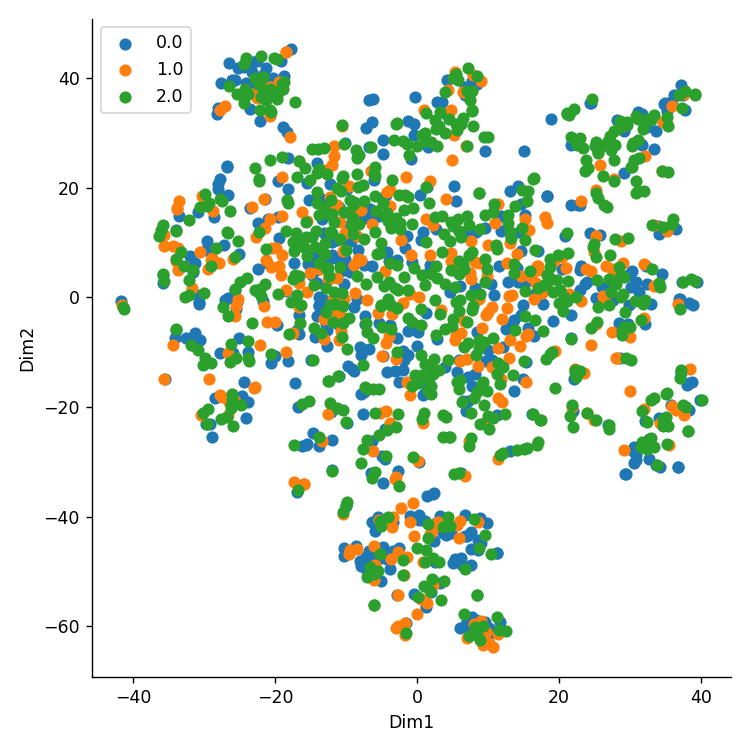

In [380]:
tsne_df=pd.DataFrame(data=tsne_data,columns=['Dim1','Dim2','labels'])
sns.FacetGrid(tsne_df,size=6,hue='labels').map(plt.scatter,'Dim1','Dim2')
plt.legend()
# plt.savefig('./figs/TSNE/Wave_Cz_8Feature__TSNE.png')
plt.show()

## Train Test split 

In [5]:
def split(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    stratify=y)
    return X_train, X_test, y_train, y_test

In [385]:
X_train_eeg, X_test_eeg, y_train_eeg, y_test_eeg = split(eeg_features,y)

In [386]:
print('X train: ',X_train_eeg.shape)
print('X test: ',X_test_eeg.shape)

X train:  (1148, 64)
X test:  (287, 64)


## MLP classification classifier

train accuracy: 0.5043554006968641
test accuracy: 0.5365853658536586
f1_micro: 0.54


<IPython.core.display.Javascript object>


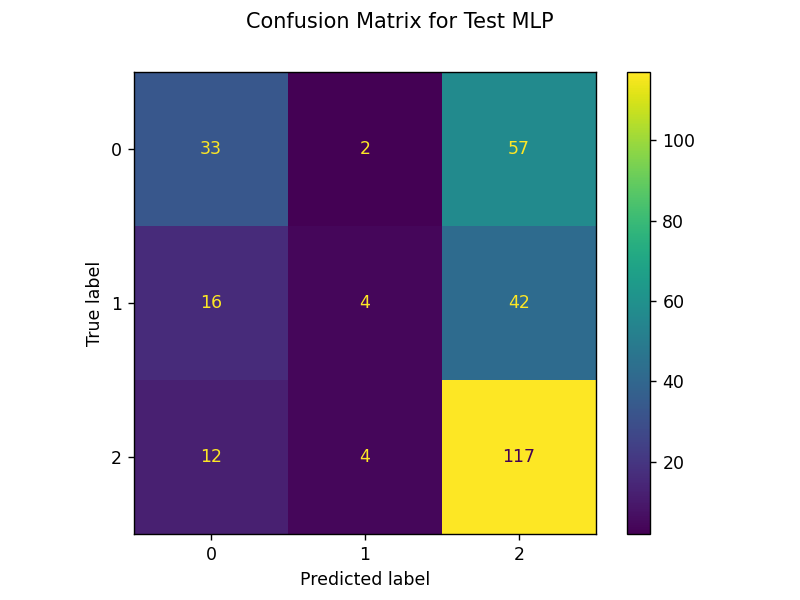

Text(0.5, 0.98, 'Confusion Matrix for Test MLP')

In [399]:
clf = MLPClassifier().fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
fig.figure_.suptitle("Confusion Matrix for Test MLP")
# plt.savefig("./figs/confmatrix/Wave_Cz_8Feature_MLP.png")

## Random Forest classifier

train accuracy: 1.0
test accuracy: 0.5644599303135889
f1_micro: 0.56


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


<IPython.core.display.Javascript object>


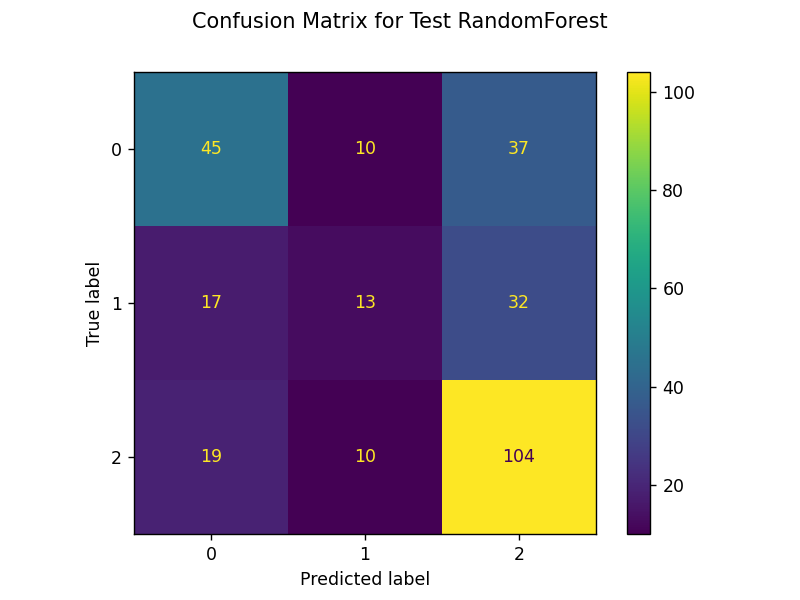

Text(0.5, 0.98, 'Confusion Matrix for Test RandomForest')

In [400]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,n_estimators=25)
clf.fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
fig.figure_.suptitle("Confusion Matrix for Test RandomForest")
# plt.savefig("./figs/confmatrix/Wave_Cz_8Feature_RandomForest.png")

## SVM classifier 

train accuracy: 0.5087108013937283
test accuracy: 0.5156794425087108
f1_micro: 0.52


<IPython.core.display.Javascript object>


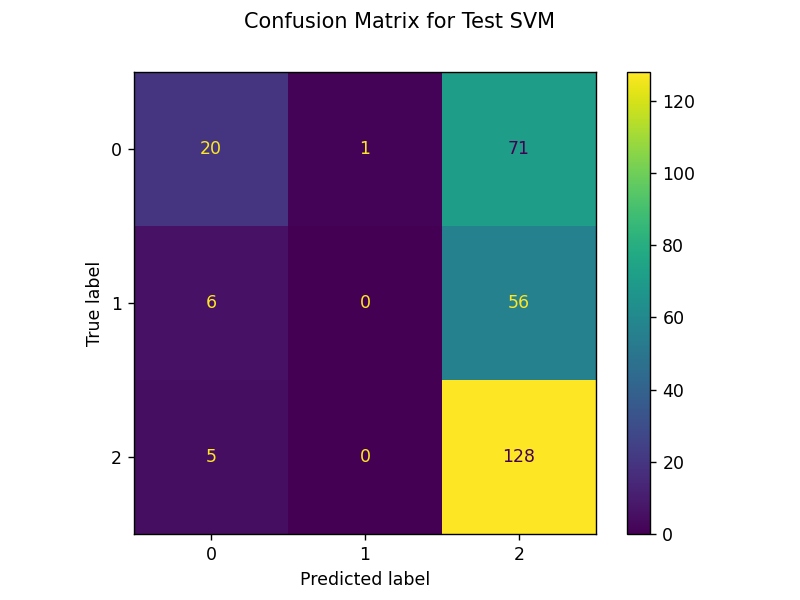

Text(0.5, 0.98, 'Confusion Matrix for Test SVM')

In [393]:
y_pred_eeg=[]
clf = svm.SVC(C=1.0,kernel='rbf')
clf.fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)
print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
fig.figure_.suptitle("Confusion Matrix for Test SVM")
# plt.savefig("./figs/confmatrix/Wave_Cz_8Feature_SVM.png")

## SelectKBest for feature selection 

In [9]:
data= pd.read_csv('wave_4Feature_all_chanel.csv')
y = data.loc[:,'SafetyPref_3c']
x = data.iloc[:,0:-1]
x_safety = x
bestfeatures = SelectKBest(score_func=fs.f_classif)
fit = bestfeatures.fit(x_safety,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfpvalue = pd.DataFrame(fit.pvalues_)
featureScores = pd.concat([dfcolumns,dfscores,dfpvalue],axis=1)
featureScores.columns = ['Specs','Score','Pvalue']  #naming the dataframe columns
# print(featureScores.sort_values(by='Score',ascending=False))
f_chi= featureScores.nlargest(64,'Score')
f_chi
f_chi.to_csv('./selectkbest/wave_4Feature_all_chanel_selectkbest.csv',index=False)

## ExtraTreeClassifier for feature selection 


In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

data= pd.read_csv('./wave_all_chanel_8_Feature.csv')
y = data.loc[:,'SafetyPref_3c']
x = data.iloc[:,1:-1]
x_safety = x

model = ExtraTreesClassifier()
model.fit(x_safety,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_safety.columns)

In [18]:
feat_importances.nlargest(10)
l =feat_importances.nlargest(10).keys()

x = x_safety[l] 
X_train_eeg, X_test_eeg, y_train_eeg, y_test_eeg = split(x,y)

In [19]:
l

Index(['A2_D_std', 'A1_D_std', 'A1_D_mean', 'T3_A_std', 'T6_A_std',
       'O1_D_mean', 'A1_cD_Energy', 'C3_A_mean', 'C3_D_std', 'A1_D_Entropy'],
      dtype='object')

In [20]:
X_train_eeg.shape

(1148, 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


train accuracy: 1.0
test accuracy: 0.5261324041811847
f1_micro: 0.53


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished


<IPython.core.display.Javascript object>


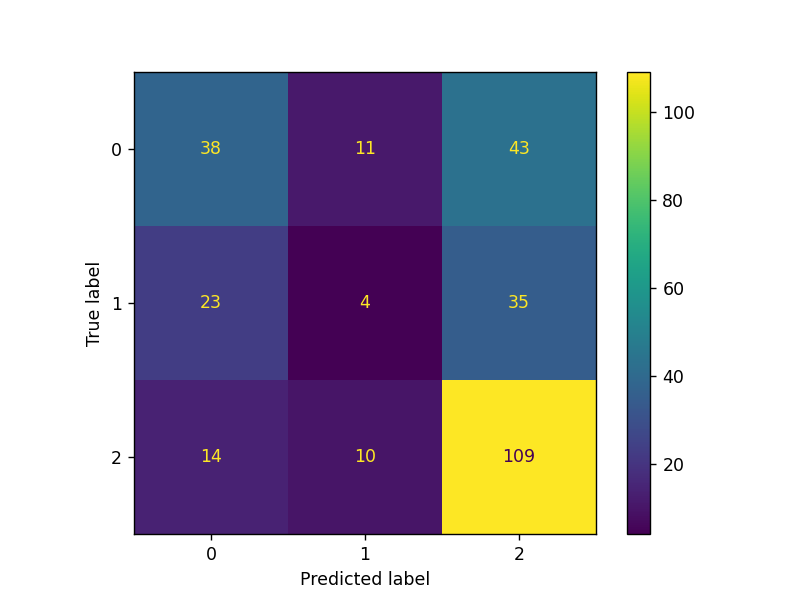

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,n_estimators=1200)
clf.fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))
fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)

## Train with selected features 

In [395]:
x = x_safety[list(f_chi['Specs'])] 
X_train_eeg, X_test_eeg, y_train_eeg, y_test_eeg = split(x,y)

In [404]:
X_train_eeg

,A2_cD_Energy,A2_cA_Energy,A2_D_Entropy,A2_A_Entropy,A2_D_mean,A2_A_mean,A2_D_std,A2_A_std,A1_cD_Energy,A1_cA_Energy,...,Fp2_D_std,Fp2_A_std,Fp1_cD_Energy,Fp1_cA_Energy,Fp1_D_Entropy,Fp1_A_Entropy,Fp1_D_mean,Fp1_A_mean,Fp1_D_std,Fp1_A_std
0,-0.146841,-0.118792,-0.138553,-0.112980,-0.142656,0.219093,-0.336432,-0.394152,-0.196279,-0.150335,...,-0.237481,-0.305815,-0.097948,-0.190438,-0.088897,-0.178295,0.161818,-0.062040,-0.499717,-0.579301
1,-0.142249,-0.118915,-0.135755,-0.113066,0.441461,-0.093172,-0.285686,-0.398215,-0.191962,-0.149800,...,-0.230003,-0.309312,-0.097655,-0.190624,-0.088745,-0.178408,0.175001,-0.022738,-0.482198,-0.585752
2,-0.146623,-0.118711,-0.138424,-0.112916,-0.086278,0.296768,-0.336936,-0.391584,-0.195411,-0.150407,...,-0.235207,-0.309325,-0.097977,-0.190621,-0.088912,-0.178412,-0.182769,0.031350,-0.498056,-0.585639
3,-0.148381,-0.118856,-0.139511,-0.113025,0.449857,-0.115840,-0.360073,-0.396132,-0.194134,-0.150483,...,-0.233329,-0.306351,-0.098010,-0.190713,-0.088928,-0.178460,0.094432,0.058608,-0.499759,-0.589079
4,-0.148036,-0.118669,-0.139276,-0.112914,-0.344201,-0.146687,-0.349474,-0.389727,-0.194417,-0.149971,...,-0.234185,-0.306683,-0.097913,-0.190626,-0.088880,-0.178407,0.091601,0.052072,-0.498329,-0.585838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.155071,-0.118536,-0.143299,-0.112784,0.160461,-0.118111,-0.426877,-0.345953,-0.199519,-0.150951,...,-0.206608,-0.238127,-0.098083,-0.189427,-0.088944,-0.177621,-0.146141,0.071912,-0.463566,-0.514242
1431,-0.154696,-0.117692,-0.143090,-0.112267,-0.136843,-0.012020,-0.411605,-0.313355,-0.199290,-0.150393,...,-0.179304,-0.171414,-0.097555,-0.184710,-0.088585,-0.174147,-0.687906,-0.078873,-0.408910,-0.400365
1432,-0.154263,-0.116480,-0.142832,-0.111464,-0.428492,-0.240639,-0.398255,-0.274293,-0.199243,-0.149901,...,-0.172585,-0.170483,-0.097262,-0.184911,-0.088412,-0.174435,-0.563363,-0.102464,-0.384872,-0.404226
1433,-0.154508,-0.116409,-0.142985,-0.111416,0.030923,-0.044199,-0.403478,-0.272084,-0.199497,-0.149850,...,-0.146994,-0.078663,-0.096603,-0.174156,-0.087901,-0.166125,0.007589,-0.238560,-0.339784,-0.244949


### Random Forest classifier 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


train accuracy: 1.0
test accuracy: 0.5853658536585366
f1_micro: 0.59


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished


<IPython.core.display.Javascript object>


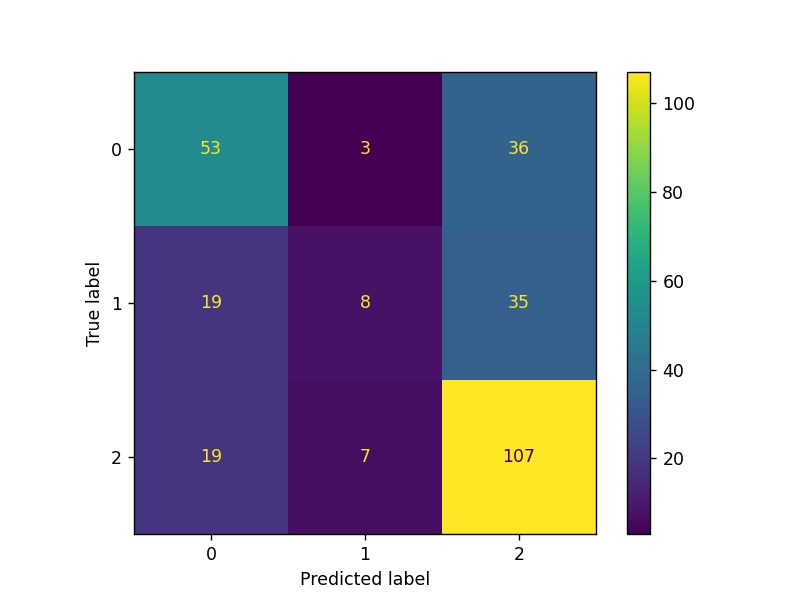

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,n_estimators=1200)
clf.fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))
fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
# fig.figure_.suptitle("Confusion Matrix for Test RandomForest")

### SVM classifier 

train accuracy: 0.460801393728223
test accuracy: 0.4634146341463415
f1_micro: 0.46


<IPython.core.display.Javascript object>


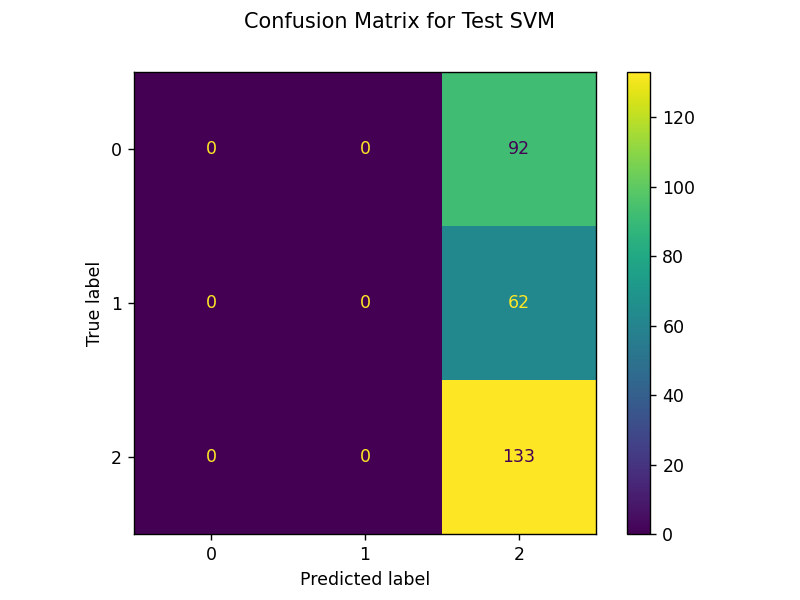

Text(0.5, 0.98, 'Confusion Matrix for Test SVM')

In [14]:
y_pred_eeg=[]
clf = svm.SVC(C=1.0,kernel='rbf')
clf.fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)
print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
fig.figure_.suptitle("Confusion Matrix for Test SVM")
# plt.savefig("./figs/confmatrix/Wave_Cz_8Feature_SVM.png")

### MLP classifier 

train accuracy: 0.47473867595818814
test accuracy: 0.4738675958188153
f1_micro: 0.47


<IPython.core.display.Javascript object>


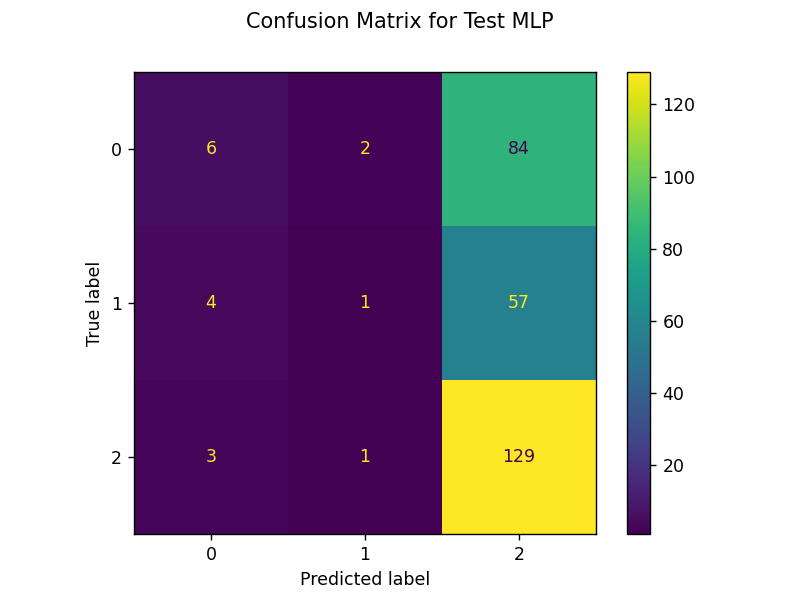

Text(0.5, 0.98, 'Confusion Matrix for Test MLP')

In [15]:
clf = MLPClassifier(early_stopping=True).fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
recall_macro = recall_score(y_test_eeg, y_pred_eeg,average='macro')
precision_macro = precision_score(y_test_eeg, y_pred_eeg,average='macro')
f1_macro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_macro))

fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
fig.figure_.suptitle("Confusion Matrix for Test MLP")
# plt.savefig("./figs/confmatrix/Wave_Cz_8Feature_MLP.png")